# =============================================================================
# PREDICTING PRICE OF PRE-OWNED CARS 
# =============================================================================

# Importing Modules

In [1]:
# # Importing modules
# # To run with Intel(R) Extension for Scikit-learn without changing the code
# # python -m sklearnex my_application.py

# # Add this line before everything else to patch the scikit-learn tools with Intel(R) Extension package (you can simply run this code then)
# # Notice the improvement in time
# from sklearnex import patch_sklearn
# patch_sklearn()
# # You need to re-import scikit-learn algorithms after the patch

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# =============================================================================
# Setting dimensions for plot 
# =============================================================================

sns.set(rc={'figure.figsize':(11.7,8.27)})

# Importing Data

In [4]:
# Reading CSV file
cars_data=pd.read_csv('cars_sampled.csv')

In [5]:
# Creating copy
cars=cars_data.copy()

In [6]:
# Structure of the dataset
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

## Summarizing data

In [7]:
# cars.describe()
# # These below parameters are there if the output doesn't display all the data, which is not needed here in Jupyter

pd.set_option('display.float_format', lambda x: '%.3f' % x)    # To change the precision for display only
cars.describe()

# # To display maximum set of columns
# pd.set_option('display.max_columns', 500)
# cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


Summary
- price :  very skewed to high value, can be visualized from the difference between mean and the median
- yearOfRegistration : Some absurd values are there
- powerPS : min value is 0, max is weird as well
- monthOfRegistration : min is 0
- postalCode : we will ignore this

In [8]:
# =============================================================================
# Dropping unwanted columns
# =============================================================================

col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [9]:
cars.shape

(50001, 14)

In [10]:
# =============================================================================
# Removing duplicate records
# =============================================================================

cars.drop_duplicates(keep='first',inplace=True)
#470 duplicate records
cars.shape

(49531, 14)

# Cleaning Data

In [11]:
# No. of missing values in each column
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

## Variable yearOfRegistration


In [12]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()   # sorts based on index(years) instead of based on frequencies
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [13]:
# Working range- 1950 and 2018
sum(cars['yearOfRegistration'] > 2018), sum(cars['yearOfRegistration'] < 1950)

(26, 38)

In [14]:
# sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
#             fit_reg=False, data=cars)
# # many outliers

## Variable price

In [15]:
price_count=cars['price'].value_counts().sort_index()
price_count
# Absurd prices 0,1,2,3,5,..., also too extreme price

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

In [16]:
# sns.distplot(cars['price'])

In [17]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

In [18]:
# sns.boxplot(y=cars['price'])    # To see the outliers

In [19]:
# Working range- 100 and 150000
sum(cars['price'] > 150000), sum(cars['price'] < 100)

(34, 1748)

## Variable powerPS

In [20]:
power_count=cars['powerPS'].value_counts().sort_index()
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

In [21]:
# sns.distplot(cars['powerPS'])

In [22]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

In [23]:
# sns.boxplot(y=cars['powerPS'])

In [24]:
# sns.regplot(x='powerPS', y='price', scatter=True, 
#             fit_reg=False, data=cars)

In [25]:
# Working range- 10 and 500
sum(cars['powerPS'] > 500), sum(cars['powerPS'] < 10)

(115, 5565)

## Changing to Working range of data

In [26]:
cars = cars[
        (cars.yearOfRegistration <= 2018) & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) & (cars.price <= 150000) 
      & (cars.powerPS >= 10) & (cars.powerPS <= 500)]
# ~6700 records are dropped
cars.shape

(42772, 14)

In [27]:
# Further to simplify- variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12  # To get in years unit

In [28]:
# Creating new varible Age by adding yearOfRegistration and monthOfRegistration(yr unit)
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()

count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [29]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)

# Visualizing parameters

## Age

In [30]:
# sns.histplot(cars['Age'], kde=True)

In [31]:
# sns.boxplot(y=cars['Age'])

## price

In [32]:
# sns.histplot(cars['price'], kde=True)

In [33]:
# sns.boxplot(y=cars['price'])

## powerPS

In [34]:
# sns.histplot(cars['powerPS'], kde=True)

In [35]:
# sns.boxplot(y=cars['price'])

## Pair wise Scatter Plots

In [36]:
# # Visualizing parameters after narrowing working range
# # Age vs price
# sns.regplot(x='Age', y='price', scatter=True, 
#             fit_reg=False, data=cars)


- Cars priced higher are newer
- With increase in age, price decreases
- However some cars are priced higher with increase in age

In [37]:
# # powerPS vs price
# sns.regplot(x='powerPS', y='price', scatter=True, 
#             fit_reg=False, data=cars)

## Variable seller

In [38]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [39]:
pd.crosstab(cars['seller'],columns='count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


In [40]:
# sns.countplot(x= 'seller',data=cars)

- Fewer cars have 'commercial'=> `Insignificant`

## Variable offerType

In [41]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

## Variable abtest

In [42]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [43]:
pd.crosstab(cars['abtest'],columns='count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


In [44]:
# sns.countplot(x= 'abtest',data=cars)
# # Equally distributed

In [45]:
# sns.boxplot(x= 'abtest',y='price',data=cars)

- For every price value there is almost 50-50 distribution
- Does not affect price => `Insignificant`

## Variable vehicleType

In [46]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [47]:
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


In [48]:
# sns.countplot(x= 'vehicleType',data=cars)

<AxesSubplot:xlabel='vehicleType', ylabel='price'>

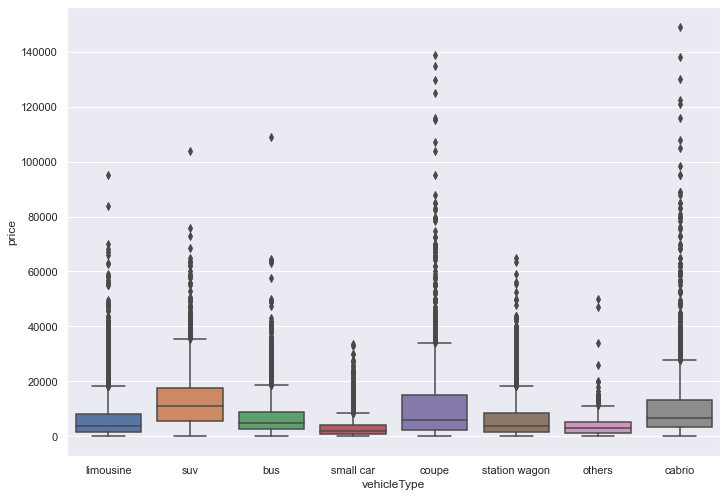

In [49]:
sns.boxplot(x= 'vehicleType',y='price',data=cars)

- 8 types- limousine, small cars and station wagons max freq
- vehicleType `affects` price

## Variable gearbox

In [50]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [51]:
pd.crosstab(cars['gearbox'],columns='count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


In [52]:
# sns.countplot(x= 'gearbox',data=cars)

<AxesSubplot:xlabel='gearbox', ylabel='price'>

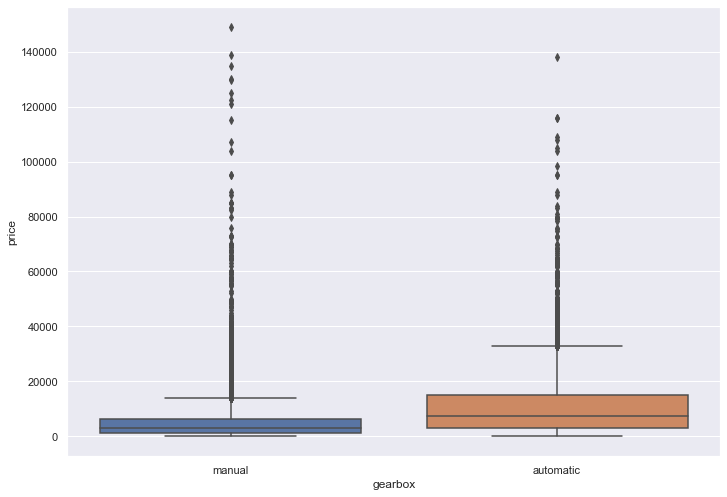

In [53]:
sns.boxplot(x= 'gearbox',y='price',data=cars)

- gearbox `affects` price

## Variable model

In [54]:
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: model, Length: 247, dtype: int64

In [55]:
# sns.countplot(x= 'model',data=cars)

In [56]:
# sns.boxplot(x= 'model',y='price',data=cars)

- Cars are distributed over many models
- `Considered` in modelling

## Variable kilometer

In [57]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [58]:
# sns.boxplot(x= 'kilometer',y='price',data=cars)

In [59]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

- `Considered` in modelling

## Variable fuelType

In [60]:
# cars['fuelType'].value_counts()
# pd.crosstab(cars['fuelType'],columns='count',normalize=True)
# sns.countplot(x= 'fuelType',data=cars)
# sns.boxplot(x= 'fuelType',y='price',data=cars)

- fuelType affects price

## Variable brand

In [61]:
# cars['brand'].value_counts()
# pd.crosstab(cars['brand'],columns='count',normalize=True)
# sns.countplot(x= 'brand',data=cars)
# sns.boxplot(x= 'brand',y='price',data=cars)

- Cars are distributed over many brands
- `Considered` for modelling 

## Variable notRepairedDamage

- yes- car is damaged but not rectified
- no- car was damaged but has been rectified

In [62]:
# cars['notRepairedDamage'].value_counts()
# pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
# sns.countplot(x= 'notRepairedDamage',data=cars)

In [63]:
# sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)

- As expected, the cars that require the damages to be repaired fall under lower price ranges

# Removing insignificant variables

In [64]:
col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars.shape

(42772, 10)

In [65]:
cars_copy=cars.copy()

# Correlation

In [66]:
cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()    # Pearson Correlation
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


<AxesSubplot:>

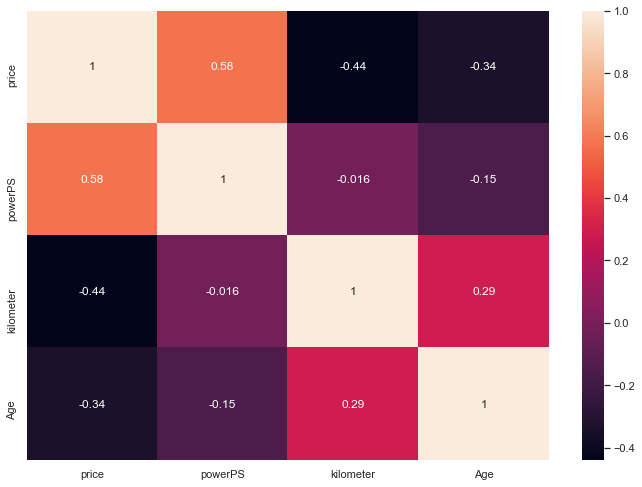

In [67]:
sns.heatmap(correlation, annot=True)

In [68]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

# Model Choice

We are going to build a `Linear Regression` and `Random Forest` model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 

# OMITTING MISSING VALUES (Rows)

In [69]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42772 entries, 0 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              42772 non-null  int64  
 1   vehicleType        39896 non-null  object 
 2   gearbox            41978 non-null  object 
 3   powerPS            42772 non-null  int64  
 4   model              41089 non-null  object 
 5   kilometer          42772 non-null  int64  
 6   fuelType           40175 non-null  object 
 7   brand              42772 non-null  object 
 8   notRepairedDamage  36495 non-null  object 
 9   Age                42772 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 4.6+ MB


In [70]:
cars_omit=cars.dropna(axis=0)
cars_omit.shape

(32884, 10)

In [71]:
cars_omit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32884 entries, 1 to 50000
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              32884 non-null  int64  
 1   vehicleType        32884 non-null  object 
 2   gearbox            32884 non-null  object 
 3   powerPS            32884 non-null  int64  
 4   model              32884 non-null  object 
 5   kilometer          32884 non-null  int64  
 6   fuelType           32884 non-null  object 
 7   brand              32884 non-null  object 
 8   notRepairedDamage  32884 non-null  object 
 9   Age                32884 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 2.8+ MB


In [72]:
# Converting categorical variables to dummy variables (HOT ENCODING)
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 

In [73]:
cars_omit.shape

(32884, 301)

In [74]:
# =============================================================================
# IMPORTING NECESSARY LIBRARIES
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# MODEL BUILDING WITH OMITTED DATA

In [75]:
# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

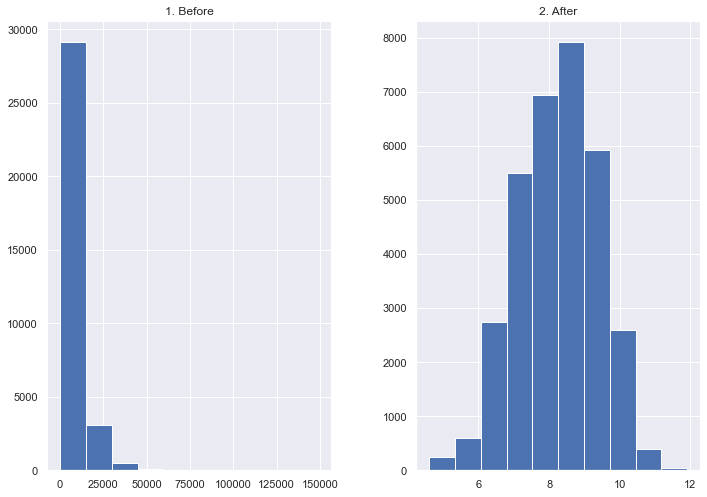

In [76]:
# Plotting the variable price (plotting the logarithm since the price falls faster)
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()

In [77]:
# Transforming price as a logarithmic value
y1 = np.log(y1)

In [78]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


In [79]:
# Standarization


## BASELINE MODEL FOR OMITTED DATA

"""
We are making a base model by using test data mean value.
This is to set a benchmark and to compare with our regression model
"""

In [80]:
# finding the mean for test data value
base_pred = np.mean(y_test)
base_pred

8.249615787653337

In [81]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [82]:
# finding the RMSE (This is why we found mean and made copies of that to the array)
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
base_root_mean_square_error

1.1274483657478247

> Any model that we build in the future should give a RMSE that is less than that of the previous value

## LINEAR REGRESSION WITH OMITTED DATA

In [83]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)

In [84]:
# Model (1.2s only!)
model_lin1=lgr.fit(X_train,y_train)

In [85]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)

In [86]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

0.5455481266513815

In [87]:
# R squared value (how good the model explains the variability of y)
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
r2_lin_test1,r2_lin_train1

(0.7658615091649266, 0.7800936978183916)

> This says that the model is working quite good  
> It's able to capture as much as variability in the test data as train data

In [88]:
# Regression diagnostics- Residual plot analysis
residuals1 = y_test - cars_predictions_lin1

<AxesSubplot:ylabel='price'>

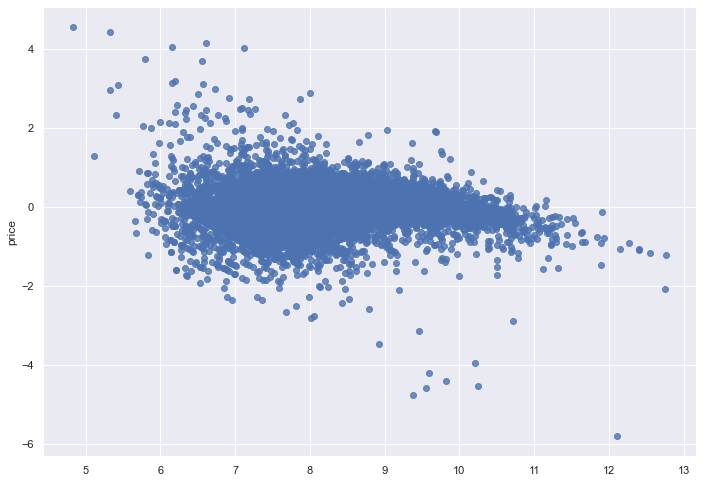

In [89]:
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)

In [90]:
residuals1.describe()

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

Mean is 0.003, which is a good thing

## RANDOM FOREST WITH OMITTED DATA

In [91]:
? RandomForestRegressor

Init signature:
 RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the for

In [92]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [93]:
# Model
model_rf1=rf.fit(X_train,y_train)

In [94]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)

In [95]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


- The lesser the RMSE is (width of error), the better the model is working
- This Random Forest is working better than the Logistic Regression

In [96]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)

0.8504018147750623 0.9202494705146291


# MODEL BUILDING WITH IMPUTED DATA

In [97]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) if x.dtype=='float' \
                            else x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [98]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 

In [99]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

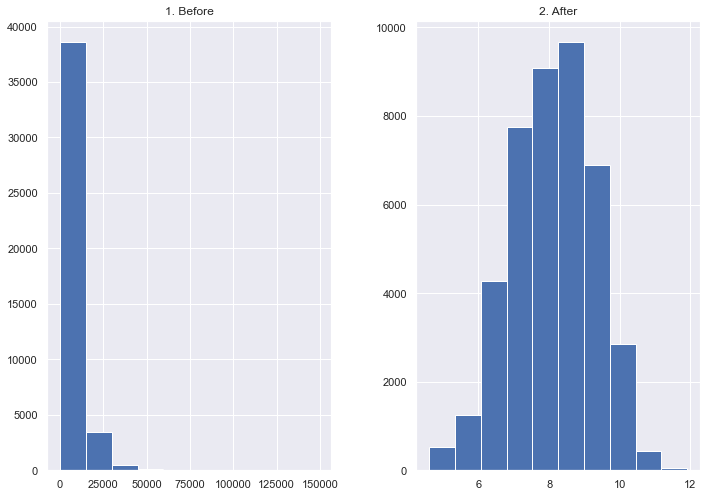

In [100]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [101]:
# Transforming price as a logarithmic value
y2 = np.log(y2)

In [102]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


In [ ]:
# Standarization


## BASELINE MODEL FOR IMPUTED DATA

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""

In [103]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
base_pred

8.068391740519193

In [104]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))

In [105]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))                             
base_root_mean_square_error_imputed

1.1884349112889792

## LINEAR REGRESSION WITH IMPUTED DATA

In [106]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)

In [107]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)

In [108]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)

In [109]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

0.6483956449231307

In [110]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
r2_lin_test2, r2_lin_train2

(0.7023339008631175, 0.7071658736894363)

## RANDOM FOREST WITH IMPUTED DATA

In [111]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)

In [112]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)

In [ ]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)

In [ ]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
rf_rmse2

In [ ]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
r2_rf_test2, r2_rf_train2

# Final output

In [ ]:
print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)


# =============================================================================
# END OF SCRIPT
# =============================================================================
